In [162]:
import requests
from bs4 import BeautifulSoup as BS


In [163]:
def prettify_page(url):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    page = requests.get(url, headers=headers, timeout=5)
    soup = BS(page.content, 'html.parser').html
    return soup

In [164]:
page_1 = prettify_page('https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2019-12-31&countries=us&sort=boxoffice_gross_us,desc&count=250&ref_=adv_prv')

In [165]:
page_2 = prettify_page('https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2019-12-31&countries=us&sort=boxoffice_gross_us,desc&count=250&start=251&ref_=adv_nxt')

In [166]:
def parse_movies(soup):
    movies_dict = {}
    items = soup.find_all('div', class_='lister-item')
    
    for item in items:
        
        movie_id = item.find('h3', class_='lister-item-header')
        movie_id = movie_id.find('a')
        movie_id = movie_id['href']
        
        movie_id = movie_id.replace('/title/', '')
        movie_id = movie_id.replace('/', '')
        movie_id = movie_id.replace('?ref_=adv_li_tt', "")
        
        title = item.find('h3', class_='lister-item-header')
        title = title.find('a').string
        
        
        user_rating = item.find('div', class_='ratings-imdb-rating') 
        if user_rating:
            user_rating = user_rating.find('strong').string
        else:
            user_rating = -1
            
        user_rating = int(float(user_rating) * 10) 
        
        metascore = item.find('div', class_ = 'ratings-metascore')
        if metascore: 
            metascore = metascore.find('span', class_ = "metascore").string.strip()
        else:
            metascore = -1
            
        metascore = int(metascore)     
        
        movies_dict[movie_id] = (title, user_rating, metascore)
        
    return movies_dict
        


In [167]:
new_dict_1 = parse_movies(page_1)
new_dict_1

{'tt4154796': ('Avengers: Endgame', 85, 78), 'tt1825683': ('Black Panther', 73, 88), 'tt4154756': ('Avengers: Infinity War', 85, 68), 'tt2527336': ('Star Wars: Episode VIII - The Last Jedi', 71, 85), 'tt3606756': ('Incredibles 2', 77, 80), 'tt6105098': ('The Lion King', 70, 55), 'tt2771200': ('Beauty and the Beast', 72, 65), 'tt1979376': ('Toy Story 4', 79, 84), 'tt4154664': ('Captain Marvel', 69, 64), 'tt4881806': ('Jurassic World: Fallen Kingdom', 62, 51), 'tt0451279': ('Wonder Woman', 74, 76), 'tt2283362': ('Jumanji: Welcome to the Jungle', 69, 58), 'tt3896198': ('Guardians of the Galaxy Vol. 2', 76, 67), 'tt6320628': ('Spider-Man: Far from Home', 76, 69), 'tt6139732': ('Aladdin', 71, 53), 'tt1477834': ('Aquaman', 70, 55), 'tt2250912': ('Spider-Man: Homecoming', 74, 73), 'tt1396484': ('It', 73, 69), 'tt5463162': ('Deadpool 2', 77, 66), 'tt3501632': ('Thor: Ragnarok', 79, 74), 'tt2709692': ("Dr. Seuss' The Grinch", 63, 51), 'tt3469046': ('Despicable Me 3', 63, 49), 'tt0974015': ('Jus

In [168]:
new_dict_2 = parse_movies(page_2)
new_dict_2

{'tt7734218': ('Stuber', 61, 42), 'tt5816682': ('Victoria & Abdul', 68, 58), 'tt4799050': ('Rough Night', 52, 51), 'tt2274648': ('Hellboy', 52, 31), 'tt4131800': ('My Little Pony: The Movie', 61, 39), 'tt4530422': ('Overlord', 66, 60), 'tt4463894': ('Shaft', 64, 40), 'tt3521126': ('The Disaster Artist', 74, 76), 'tt7329656': ('47 Meters Down: Uncaged', 50, 43), 'tt5776858': ('Phantom Thread', 75, 90), 'tt6421110': ('Proud Mary', 49, 35), 'tt2072233': ('Sleepless', 56, 34), 'tt1308728': ('The Happytime Murders', 54, 27), 'tt6003368': ('Diary of a Wimpy Kid: The Long Haul', 43, 39), 'tt6324278': ('Abominable', 70, 61), 'tt1025100': ('Gemini Man', 57, 38), 'tt7690670': ('SuperFly', 51, 52), 'tt4287320': ('The Circle', 53, 43), 'tt1946502': ('UglyDolls', 48, 39), 'tt9024106': ('Unplanned', 58, 10), 'tt1206885': ('Rambo: Last Blood', 63, 26), 'tt0493405': ('CHIPS', 60, 28), 'tt3829920': ('Only The Brave', 77, 72), 'tt6628394': ('Bad Times at the El Royale', 71, 60), 'tt5109784': ('Mother!',

In [169]:
import mysql.connector
import config
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.pw,
    database = 'movie_db'
)

cursor = cnx.cursor()


In [13]:
def close_db():
    cursor.close()
    cnx.close()

In [123]:
def add_to_table(movie_dict):
    for movie_id in movie_dict.keys():
        data_movie = {
      'movie_id': movie_id,
      'title': movie_dict[movie_id][0],
      'user_rating': movie_dict[movie_id][1],
      'metascore': movie_dict[movie_id][2],
        }
        #print(data_movie)
        
        inserting = """INSERT INTO Master_Table  
         (movie_id, title, user_rating, metascore) 
         VALUES (%(movie_id)s, %(title)s, %(user_rating)s, %(metascore)s);"""
        
        cursor.execute(inserting, data_movie)
        cnx.commit()
        
        

In [64]:
add_to_table(new_dict_2)

In [ ]:
#<span class=“ipl-status-pill ipl-status-pill--ok”>Mild</span>

In [143]:
def parse_parent_guide(movie_id):
    
    categories = {}
    url = "https://www.imdb.com/title/" + movie_id + "/parentalguide?ref_=tt_stry_pg"
    soup = prettify_page(url)
    
    
    mpaa_rating = soup.find(id="mpaa-rating")
    
    if mpaa_rating:
        mpaa_rating = mpaa_rating.find_all("td")[1].string
    else:
        mpaa_rating = "None"
    
    
    nudity = soup.find('section', id='advisory-nudity')
    
    if nudity:
        nudity = nudity.find('span', class_='ipl-status-pill').string
    else:
        nudity = 'No Data'
    
    
    violence = soup.find('section', id='advisory-violence')
    
    if violence:
        violence = violence.find('span', class_='ipl-status-pill').string
    else:
        violence = 'No Data'
    
    profanity = soup.find('section', id='advisory-profanity')
    
    if profanity:
        profanity = profanity.find('span', class_='ipl-status-pill').string
    else:
        profanity = "No Data"
    
    alcohol = soup.find('section', id='advisory-alcohol')
    
    if alcohol:
        alcohol = alcohol.find('span', class_='ipl-status-pill').string
    else:
        alcohol = "No Data"
    
    frightening = soup.find('section', id='advisory-frightening')
    
    if frightening:
        frightening = frightening.find('span', class_='ipl-status-pill').string
    else:
        fightening = "No Data"
        
    categories[movie_id] = (mpaa_rating, nudity, violence, profanity, alcohol, frightening)
    
    return categories
    
    #print(f"nudity: {nudity}, violence: {violence}, profanity: {profanity}, alcohol: {alcohol}, frightening: {frightening}")
  

In [144]:
parse_parent_guide('tt4154796')

{'tt4154796': ('Rated PG-13 for sequences of sci-fi violence and action, and some language',
  'None',
  'Moderate',
  'Mild',
  'Mild',
  'Moderate')}

In [15]:
import requests
import time

In [184]:
def parse_all_categories(movie_dict):
    counter = 0
    categories = {}
    for movie_id in movie_dict.keys():
        categories = parse_parent_guide(movie_id)[movie_id]
        
        
        inserting = f"UPDATE Master_Table SET MPAA_rating = '{categories[0]}', nudity = '{categories[1]}', violence = '{categories[2]}', profanity = '{categories[3]}', alcohol = '{categories[4]}', frightening = '{categories[5]}' WHERE movie_id = '{movie_id}'"
        

        cursor.execute(inserting)
        cnx.commit()

        print(inserting)
        
        if counter%20 == 0:
            time.sleep(10)
        else:
            time.sleep(1)
        counter += 1
        
    return categories

In [185]:
#parse_all_categories(new_dict_1)

UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sequences of sci-fi violence and action, and some language', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt4154796'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for prolonged sequences of action violence, and a brief rude gesture', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt1825683'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for intense sequences of sci-fi violence and action throughout, language and some crude references.', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt4154756'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sequences of sci-fi action and violence.', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_

UPDATE Master_Table SET MPAA_rating = 'Rated PG for frenetic sequences of animated action violence, thematic elements, and mild language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt4633694'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for intense war experience and some language', nudity = 'None', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt5013056'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for terror and some bloody images', nudity = 'None', violence = 'Moderate', profanity = 'None', alcohol = 'None', frightening = 'Severe' WHERE movie_id = 'tt6644200'
UPDATE Master_Table SET MPAA_rating = 'Rated R for violence, bloody images, and language including sexual references', nudity = 'Mild', violence = 'Moderate', profanity = 'Severe', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt5052448'
UPDATE Master_Table SET MPAA_rating

UPDATE Master_Table SET MPAA_rating = 'Rated R for strong erotic sexual content, some graphic nudity, and language', nudity = 'Severe', violence = 'Mild', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt4465564'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for violence including some bloody images, thematic elements, and language', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt6823368'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sequences of monster action violence and destruction, and for some language', nudity = 'None', violence = 'Moderate', profanity = 'Moderate', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt3741700'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for suggestive content and drug use', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt1987680'
UPDATE Mast

UPDATE Master_Table SET MPAA_rating = 'Rated R for horror violence and terror', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Severe' WHERE movie_id = 'tt8350360'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for crude sexual content, language, and drug references throughout', nudity = 'Severe', violence = 'Mild', profanity = 'Severe', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt7054636'
UPDATE Master_Table SET MPAA_rating = 'Rated R for crude sexual  content and language throughout, and some drug use', nudity = 'Moderate', violence = 'None', profanity = 'Severe', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt6359956'
UPDATE Master_Table SET MPAA_rating = 'Rated R for strong disturbing violence throughout, pervasive language, some sexuality and drug use', nudity = 'Mild', violence = 'Severe', profanity = 'Severe', alcohol = 'Moderate', frightening = 'Moderate' WHERE movie_id = 'tt6133466'
UPDATE Mas

UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sexual material, drug content and partying', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt5619332'
UPDATE Master_Table SET MPAA_rating = 'Rated R for sequences of strong violence, language throughout, and some sexuality/nudity', nudity = 'Moderate', violence = 'Severe', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Moderate' WHERE movie_id = 'tt2406566'
UPDATE Master_Table SET MPAA_rating = 'Rated R for language throughout and some sexuality/nudity', nudity = 'Mild', violence = 'Mild', profanity = 'Severe', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt3532216'
UPDATE Master_Table SET MPAA_rating = 'Rated R for strong bloody violence, language throughout, and crude sexual references', nudity = 'Mild', violence = 'Severe', profanity = 'Severe', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt3829266'
UPDATE Master_Tab

UPDATE Master_Table SET MPAA_rating = 'Rated PG for thematic elements, some peril and language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt7616798'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sci-fi violence and action, suggestive material and brief language', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'None' WHERE movie_id = 'tt2239822'
UPDATE Master_Table SET MPAA_rating = 'Rated PG for some thematic elements', nudity = 'None', violence = 'Mild', profanity = 'None', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt4587656'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for thematic elements, sexual references, language and teen partying', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt5164432'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for violence and disturbing conte

UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for thematic elements and some violent images', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt5104604'
UPDATE Master_Table SET MPAA_rating = 'Rated R for sexual content and language throughout, and for drug material.', nudity = 'Moderate', violence = 'Mild', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt8097306'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for injury images, peril, language, brief drug use, partial nudity and thematic elements', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt6306064'
UPDATE Master_Table SET MPAA_rating = 'Rated PG for thematic elements, some suggestive material, and language', nudity = 'Mild', violence = 'None', profanity = 'None', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt6398184'
UPDATE Mast

UPDATE Master_Table SET MPAA_rating = 'Rated R for language including sexual references, some graphic nudity and drug use.', nudity = 'Moderate', violence = 'None', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt1389072'
UPDATE Master_Table SET MPAA_rating = 'Rated R for horror violence and terror throughout, and for language', nudity = 'Mild', violence = 'Severe', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt1285009'
UPDATE Master_Table SET MPAA_rating = 'Rated R for language throughout, drug content, violence, some sexual references, and brief nudity', nudity = 'Mild', violence = 'Moderate', profanity = 'Severe', alcohol = 'Moderate', frightening = 'Moderate' WHERE movie_id = 'tt4537896'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for crude and sexual material, language throughout, some violence and drug content', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening

('Rated PG-13 for terror, horror violence, bloody images, sexual content, thematic elements, partial nudity, some language and teen drinking',
 'Mild',
 'Moderate',
 'Moderate',
 'None',
 'Moderate')

In [187]:
#parse_all_categories(new_dict_2)

UPDATE Master_Table SET MPAA_rating = 'Rated R for violence and language throughout, some sexual references and brief graphic nudity', nudity = 'Moderate', violence = 'Moderate', profanity = 'Severe', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt7734218'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for some thematic elements and language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt5816682'
UPDATE Master_Table SET MPAA_rating = 'R for crude sexual content, language throughout, drug use and brief bloody images', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt4799050'
UPDATE Master_Table SET MPAA_rating = 'Rated R for strong bloody violence and gore throughout, and language', nudity = 'Mild', violence = 'Severe', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Severe' WHERE movie_id = 'tt2274648'
UPDAT

UPDATE Master_Table SET MPAA_rating = 'Rated PG for thematic material, brief language and some smoking.', nudity = 'None', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt8637428'
UPDATE Master_Table SET MPAA_rating = 'Rated PG - 13 for violence and terror, sexual  content, language, thematic material, and some drug  references', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt2039338'
UPDATE Master_Table SET MPAA_rating = 'Rated PG for fantasy action violence, scary images, thematic elements including some bullying, and language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt6811018'
UPDATE Master_Table SET MPAA_rating = 'Rated R for strong violence and pervasive language', nudity = 'Moderate', violence = 'Severe', profanity = 'Severe', alcohol = 'Mild', frightening = 'Severe' WHERE mo

UPDATE Master_Table SET MPAA_rating = 'Rated PG for some thematic elements', nudity = 'None', violence = 'None', profanity = 'None', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt5427194'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for thematic material, racial epithets, some violence and a suggestive reference', nudity = 'Mild', violence = 'None', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt4807408'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for mature thematic content, sexuality, violence and some strong language.', nudity = 'Mild', violence = 'Mild', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt5301662'
UPDATE Master_Table SET MPAA_rating = 'Rated R for disturbing violence throughout, bloody images, and language', nudity = 'Mild', violence = 'Severe', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt5461944'
UPDATE Master_Table SET MPAA

UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for thematic content, language, teen drinking, and suggestive material', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt7026672'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for language, suggestive material and brief violence', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt5721088'
UPDATE Master_Table SET MPAA_rating = 'Rated PG for thematic material throughout', nudity = 'None', violence = 'Mild', profanity = 'None', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt3892172'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for sci-fi violence and action, some sexual content, brief language and drug material', nudity = 'Mild', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt5968394'
UPDATE Master_Table SET 

UPDATE Master_Table SET MPAA_rating = 'None', nudity = 'None', violence = 'None', profanity = 'None', alcohol = 'None', frightening = 'None' WHERE movie_id = 'tt7935892'
UPDATE Master_Table SET MPAA_rating = 'Rated R for pervasive drug and alcohol use, language throughout, nudity and some strong sexual content', nudity = 'Severe', violence = 'Mild', profanity = 'Severe', alcohol = 'Severe', frightening = 'Mild' WHERE movie_id = 'tt6511932'
UPDATE Master_Table SET MPAA_rating = 'Rated R for some strong sexuality', nudity = 'Severe', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt6108178'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for thematic elements involving domestic abuse, violence, some sexuality and language', nudity = 'Mild', violence = 'Severe', profanity = 'None', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt6848602'
UPDATE Master_Table SET MPAA_rating = 'Rated R for some disturbing violent images', nu

UPDATE Master_Table SET MPAA_rating = 'Rated PG for thematic elements, some violence and language', nudity = 'None', violence = 'None', profanity = 'None', alcohol = 'None', frightening = 'None' WHERE movie_id = 'tt5319866'
UPDATE Master_Table SET MPAA_rating = 'Rated R for language and some drug material', nudity = 'Mild', violence = 'Mild', profanity = 'Severe', alcohol = 'Moderate', frightening = 'Moderate' WHERE movie_id = 'tt8267604'
UPDATE Master_Table SET MPAA_rating = 'Rated R for graphic nudity, sexual content and language', nudity = 'Moderate', violence = 'Mild', profanity = 'Severe', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt5666304'
UPDATE Master_Table SET MPAA_rating = 'Rated R for disturbing violent images, language throughout, and brief sexuality/nudity', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Moderate' WHERE movie_id = 'tt2368254'
UPDATE Master_Table SET MPAA_rating = 'Rated R for sexual 

UPDATE Master_Table SET MPAA_rating = 'None', nudity = 'None', violence = 'None', profanity = 'None', alcohol = 'None', frightening = 'None' WHERE movie_id = 'tt6495388'
UPDATE Master_Table SET MPAA_rating = 'Rated R for language throughout, crude sexual references, some drug use and a brief nude image', nudity = 'Moderate', violence = 'None', profanity = 'Severe', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt6288250'
UPDATE Master_Table SET MPAA_rating = 'Rated PG - 13 for some violent content and  thematic material', nudity = 'None', violence = 'None', profanity = 'None', alcohol = 'None', frightening = 'None' WHERE movie_id = 'tt2482856'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for some language', nudity = 'None', violence = 'None', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt5175450'
UPDATE Master_Table SET MPAA_rating = 'Rated PG-13 for some language and brief violence', nudity = 'None', violence = 'None', profanity = 

UPDATE Master_Table SET MPAA_rating = 'None', nudity = 'None', violence = 'Mild', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt6705860'


('None', 'None', 'Mild', 'Moderate', 'Moderate', 'Mild')

In [170]:
def parse_user_ratings(movie_id):
    url = "https://www.imdb.com/title/" + movie_id + "/ratings"
    soup = prettify_page(url)
    
    table = soup.find('table')
    
    if not table:
        return [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
    
    rows = table.find_all('tr')    
        
    vote_array = []
    for row in rows:
        votes = row.find('div', class_='leftAligned').string
        if votes != 'Votes':
            votes = votes.replace(',','')
            votes = int(votes)
            vote_array.append(votes)
        
            
    reverse_votes = vote_array[::-1]
    return reverse_votes
    

In [171]:
parse_user_ratings('tt6421110')

#tt4154796

[559, 406, 628, 1052, 1557, 1287, 723, 397, 156, 575]

In [174]:
def parse_all_uratings(movie_dict):
    counter = 0

    for movie_id in movie_dict.keys():
        parsed_list = parse_user_ratings(movie_id)
        
        print(parsed_list[0])
        
        
        data_user_rating = {
        'movie_id': movie_id,
         'one': parsed_list[0],
        'two': parsed_list[1],
        'three': parsed_list[2],
        'four': parsed_list[3],
        'five': parsed_list[4],
        'six': parsed_list[5],
        'seven': parsed_list[6],
        'eight': parsed_list[7],
        'nine': parsed_list[8],
        'ten': parsed_list[9],
         }
        
        print(data_user_rating)


        inserting = """INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);"""

        cursor.execute(inserting, data_user_rating)
        cnx.commit()
        print(inserting)
            
            

        if counter%20 == 0:
            time.sleep(10)
        else:
            time.sleep(1)
        counter += 1
        
        #break

In [175]:
parse_all_uratings(new_dict_2)

1365
{'movie_id': 'tt7734218', 'one': 1365, 'two': 628, 'three': 888, 'four': 1285, 'five': 3143, 'six': 6181, 'seven': 5782, 'eight': 2517, 'nine': 827, 'ten': 1407}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
429
{'movie_id': 'tt5816682', 'one': 429, 'two': 137, 'three': 310, 'four': 673, 'five': 1994, 'six': 5939, 'seven': 9416, 'eight': 5262, 'nine': 1763, 'ten': 1748}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
2437
{'movie_id': 'tt4799050', 'one': 2437, 'two': 1883, 'three': 2951, 'four': 5250, 'five': 9685, 'six': 9910, 'seven': 5283, 'eight': 2175, 'nine': 767, 'ten': 1550}
INSERT INTO User_Rating

1289
{'movie_id': 'tt0493405', 'one': 1289, 'two': 922, 'three': 1271, 'four': 2394, 'five': 5352, 'six': 10801, 'seven': 9216, 'eight': 4259, 'nine': 1342, 'ten': 2142}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
265
{'movie_id': 'tt3829920', 'one': 265, 'two': 146, 'three': 237, 'four': 400, 'five': 1257, 'six': 3944, 'seven': 12117, 'eight': 16944, 'nine': 7741, 'ten': 6497}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
1002
{'movie_id': 'tt6628394', 'one': 1002, 'two': 656, 'three': 1105, 'four': 2260, 'five': 6018, 'six': 17225, 'seven': 34667, 'eight': 28343, 'nine': 9957, 'ten': 5959}
INSERT INTO Use

INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
1856
{'movie_id': 'tt1571234', 'one': 1856, 'two': 1705, 'three': 3106, 'four': 6152, 'five': 12833, 'six': 22145, 'seven': 20783, 'eight': 10412, 'nine': 3488, 'ten': 4356}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
847
{'movie_id': 'tt1846589', 'one': 847, 'two': 467, 'three': 821, 'four': 1592, 'five': 3609, 'six': 8466, 'seven': 12404, 'eight': 7798, 'nine': 3061, 'ten': 3425}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five

427
{'movie_id': 'tt6000478', 'one': 427, 'two': 181, 'three': 390, 'four': 985, 'five': 2950, 'six': 7211, 'seven': 7914, 'eight': 3467, 'nine': 979, 'ten': 1178}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
340
{'movie_id': 'tt8266310', 'one': 340, 'two': 114, 'three': 140, 'four': 272, 'five': 626, 'six': 1587, 'seven': 2830, 'eight': 2173, 'nine': 906, 'ten': 800}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
375
{'movie_id': 'tt2837574', 'one': 375, 'two': 239, 'three': 372, 'four': 976, 'five': 2818, 'six': 7959, 'seven': 11805, 'eight': 5939, 'nine': 1524, 'ten': 1022}
INSERT INTO User_Ratings  
     

1239
{'movie_id': 'tt6476140', 'one': 1239, 'two': 1337, 'three': 1942, 'four': 3000, 'five': 5318, 'six': 5970, 'seven': 4191, 'eight': 2009, 'nine': 769, 'ten': 1203}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
327
{'movie_id': 'tt4701724', 'one': 327, 'two': 265, 'three': 454, 'four': 1067, 'five': 2683, 'six': 5297, 'seven': 4311, 'eight': 1555, 'nine': 436, 'ten': 640}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
204
{'movie_id': 'tt2924392', 'one': 204, 'two': 130, 'three': 154, 'four': 207, 'five': 247, 'six': 167, 'seven': 111, 'eight': 92, 'nine': 237, 'ten': 836}
INSERT INTO User_Ratings  
      

962
{'movie_id': 'tt5360952', 'one': 962, 'two': 871, 'three': 1429, 'four': 2324, 'five': 3660, 'six': 3442, 'seven': 2030, 'eight': 816, 'nine': 327, 'ten': 752}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
385
{'movie_id': 'tt7026672', 'one': 385, 'two': 196, 'three': 356, 'four': 682, 'five': 1775, 'six': 3598, 'seven': 4009, 'eight': 2155, 'nine': 878, 'ten': 1199}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
505
{'movie_id': 'tt5721088', 'one': 505, 'two': 439, 'three': 589, 'four': 975, 'five': 1209, 'six': 787, 'seven': 363, 'eight': 133, 'nine': 56, 'ten': 209}
INSERT INTO User_Ratings  
         (

707
{'movie_id': 'tt6921996', 'one': 707, 'two': 705, 'three': 1388, 'four': 3108, 'five': 7591, 'six': 15037, 'seven': 13583, 'eight': 5688, 'nine': 1943, 'ten': 3611}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
1310
{'movie_id': 'tt1801552', 'one': 1310, 'two': 814, 'three': 961, 'four': 1397, 'five': 2132, 'six': 2132, 'seven': 1237, 'eight': 551, 'nine': 254, 'ten': 945}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
464
{'movie_id': 'tt7242142', 'one': 464, 'two': 166, 'three': 251, 'four': 417, 'five': 992, 'six': 2313, 'seven': 5166, 'eight': 5839, 'nine': 3051, 'ten': 1992}
INSERT INTO User_Ratings  

271
{'movie_id': 'tt3203528', 'one': 271, 'two': 190, 'three': 315, 'four': 682, 'five': 1556, 'six': 3652, 'seven': 4469, 'eight': 2272, 'nine': 806, 'ten': 898}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
797
{'movie_id': 'tt5466186', 'one': 797, 'two': 300, 'three': 434, 'four': 812, 'five': 1999, 'six': 3171, 'seven': 2266, 'eight': 932, 'nine': 303, 'ten': 466}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
547
{'movie_id': 'tt4971344', 'one': 547, 'two': 314, 'three': 525, 'four': 977, 'five': 2663, 'six': 7031, 'seven': 14709, 'eight': 10083, 'nine': 2763, 'ten': 1421}
INSERT INTO User_Ratings  
     

592
{'movie_id': 'tt5639354', 'one': 592, 'two': 162, 'three': 230, 'four': 405, 'five': 988, 'six': 2743, 'seven': 5853, 'eight': 5316, 'nine': 2042, 'ten': 1169}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
192
{'movie_id': 'tt7074886', 'one': 192, 'two': 93, 'three': 172, 'four': 469, 'five': 1306, 'six': 3021, 'seven': 2398, 'eight': 772, 'nine': 156, 'ten': 243}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
839
{'movie_id': 'tt6205872', 'one': 839, 'two': 446, 'three': 511, 'four': 821, 'five': 1504, 'six': 2180, 'seven': 2258, 'eight': 1547, 'nine': 672, 'ten': 810}
INSERT INTO User_Ratings  
         

205
{'movie_id': 'tt6288124', 'one': 205, 'two': 96, 'three': 161, 'four': 401, 'five': 1174, 'six': 3319, 'seven': 6016, 'eight': 3706, 'nine': 1182, 'ten': 792}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
533
{'movie_id': 'tt5825380', 'one': 533, 'two': 283, 'three': 570, 'four': 1272, 'five': 3095, 'six': 5884, 'seven': 5561, 'eight': 2673, 'nine': 753, 'ten': 908}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
69
{'movie_id': 'tt7374952', 'one': 69, 'two': 30, 'three': 36, 'four': 52, 'five': 110, 'six': 126, 'seven': 91, 'eight': 42, 'nine': 22, 'ten': 126}
INSERT INTO User_Ratings  
         (movie_id,

123
{'movie_id': 'tt5737862', 'one': 123, 'two': 61, 'three': 75, 'four': 162, 'five': 362, 'six': 955, 'seven': 1108, 'eight': 532, 'nine': 169, 'ten': 150}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
473
{'movie_id': 'tt6257174', 'one': 473, 'two': 151, 'three': 210, 'four': 489, 'five': 1351, 'six': 3439, 'seven': 4765, 'eight': 2579, 'nine': 904, 'ten': 921}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
3
{'movie_id': 'tt8593814', 'one': 3, 'two': 0, 'three': 0, 'four': 1, 'five': 0, 'six': 1, 'seven': 1, 'eight': 6, 'nine': 4, 'ten': 38}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, f

31
{'movie_id': 'tt5176580', 'one': 31, 'two': 8, 'three': 21, 'four': 22, 'five': 27, 'six': 52, 'seven': 77, 'eight': 69, 'nine': 21, 'ten': 43}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
150
{'movie_id': 'tt6040662', 'one': 150, 'two': 71, 'three': 101, 'four': 282, 'five': 701, 'six': 2034, 'seven': 2777, 'eight': 1666, 'nine': 528, 'ten': 448}
INSERT INTO User_Ratings  
         (movie_id, one, two, three, four, five, six, seven, eight, nine, ten) 
         VALUES (%(movie_id)s, %(one)s, %(two)s, %(three)s, %(four)s, %(five)s, %(six)s, %(seven)s, %(eight)s, %(nine)s, %(ten)s);
203
{'movie_id': 'tt7689906', 'one': 203, 'two': 19, 'three': 27, 'four': 85, 'five': 212, 'six': 302, 'seven': 263, 'eight': 167, 'nine': 61, 'ten': 140}
INSERT INTO User_Ratings  
         (movie_id, one, two, thre

In [39]:
def parse_metacritic(movie_name):
    #categories = {}
    # https://www.metacritic.com/movie/bombshell/critic-reviews
    f = {'movie_name': movie_name}
    # encode_movie_name = urllib.parse.urlencode(f)
    # encode_movie_name = urllib.parse.quote(movie_name)
    encode_movie_name = movie_name.lower()
    encode_movie_name = encode_movie_name.replace(' ', '-')
    
    url = "https://www.metacritic.com/movie/" + encode_movie_name + "/critic-reviews"
    
    print(f"Url encoded: {url}")
    
    soup = prettify_page(url)
    review_dates = soup.find('div')
    review_dates = review_dates.find(class_="bump_section")
    
    # review_dates = soup.find('div',  class_= "pmxa_yqj4")
    # review_dates = soup.find('div', class_="pad_btm1")
    #if review_dates:
        # review_dates = mpaa_rating.find_all("td")[1].string
    #    pass
    #else:
    #    review_dates = "None"
    print(review_dates)
#     return
#     categories[movie_id] = (mpaa_rating, nudity, violence, profanity, alcohol, frightening)
#     return categories






In [40]:
parse_metacritic("Black Panther")

Url encoded: https://www.metacritic.com/movie/black-panther/critic-reviews
None


In [48]:
import pandas as pd

In [96]:
df = pd.read_csv('sample_movie_table.csv', sep='\t')

In [56]:
df.describe()

,user_rating,metascore
count,500.00000,500.00000
mean,63.61400,53.97200
std,9.87989,21.11205
min,-10.00000,-1.00000
25%,58.00000,42.00000
50%,64.00000,55.00000
75%,70.00000,69.00000
max,90.00000,94.00000


In [97]:
df.shape

(500, 10)

In [98]:
df.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening
0,tt0437086,Alita: Battle Angel,74,53,Rated PG-13 for sequences of sci-fi violence a...,None,Moderate,Mild,Mild,Moderate
1,tt0448115,Shazam!,71,71,"Rated PG-13 for intense sequences of action, l...",None,Moderate,Mild,Mild,Moderate
2,tt0451279,Wonder Woman,74,76,Rated PG-13 for sequences of violence and acti...,Mild,Moderate,Mild,Mild,Mild
3,tt0460890,The Only Living Boy in New York,63,33,Rated R for language and some drug material,Moderate,None,Moderate,Moderate,None
4,tt0491175,Suburbicon,57,42,"Rated R for violence, language and some sexuality",Mild,Moderate,Moderate,Mild,Moderate


In [ ]:
#group3_1950 = df[(df['Stage'] == 'Group 3') & (df['Year'] == 1950)]

In [59]:
wholesome = df[(df['nudity'] == 'None') & (df['violence'] == 'None') & (df['profanity'] == 'None') & (df['alcohol'] == 'None') & (df['frightening'] == 'None')]

In [61]:
wholesome['user_rating'].mean()

56.77777777777778

In [62]:
wholesome['metascore'].mean()

12.38888888888889

In [92]:
all_groups_mean = df.groupby(['nudity', 'violence', 'profanity', 'alcohol', 'frightening']).mean()

all_groups_mean

user_rating  metascore
nudity violence profanity alcohol  frightening                        
Mild   Mild     Mild      Mild     Mild           59.444444  48.444444
                                   Moderate       61.333333  59.000000
                                   None           59.250000  49.250000
                          Moderate Mild           78.000000  62.000000
                          None     Mild           59.000000  48.428571
                                   Moderate       53.500000  10.000000
                                   None           59.500000  50.000000
                Moderate  Mild     Mild           64.500000  49.250000
                                   Moderate       77.000000  72.000000
                                   None           73.000000  57.000000
                          Moderate Mild           64.000000  50.750000
                                   Moderate       71.000000  56.000000
                                   None           71.000000  87.000000
                          None     Mild           74.000000  73.000000
                          Severe   Moderate       73.000000  62.000000
                None      Mild     Mild           63.000000  77.000000
                                   Moderate       54.000000  28.000000
                                   None           56.000000  55.500000
                          None     Moderate       67.000000  63.000000
                Severe    Mild     Moderate       55.000000  22.000000
                          Moderate Mild           70.500000  66.500000
                                   Moderate       84.000000  75.000000
       Moderate Mild      Mild     Mild           67.142857  55.142857
                                   Moderate       56.777778  42.555556
                          None     Moderate       57.000000  39.000000
                Moderate  Mild     Mild           61.000000  48.750000
                                   Moderate       60.333333  51.166667
                                   None           52.000000  42.000000
                                   Severe         68.000000  79.500000
                          Moderate Moderate       60.800000  51.200000
...                                                     ...        ...
None   None     None      None     Mild           68.666667  50.833333
                                   None           56.777778  12.388889
                Severe    Mild     None           69.000000  65.000000
       Severe   Mild      Mild     None           52.000000  46.000000
                          None     Severe         53.000000  46.000000
                Moderate  Mild     Moderate       62.000000  50.000000
                                   Severe         72.000000  71.666667
                          Moderate Severe         66.000000  39.500000
                          None     Severe         62.000000  60.000000
                Severe    Mild     Moderate       56.750000  26.500000
                          Moderate Moderate       69.000000  64.000000
Severe Mild     Mild      Mild     Mild           62.000000  38.000000
                Moderate  Mild     Mild           46.000000  33.000000
                          Moderate Mild           64.000000  79.000000
                          Severe   Mild           64.000000  78.000000
                Severe    Moderate None           52.500000  54.000000
                          Severe   Mild           55.000000  55.000000
       Moderate Moderate  Mild     Mild           45.000000  31.000000
                          Moderate Mild           68.000000  56.000000
                Severe    Moderate Mild           61.000000  41.000000
                                   Moderate       61.500000  53.500000
       None     Mild      Mild     None           66.000000  74.000000
                None      None     None           46.000000  -1.000000
       Severe   Moderate  Mild     Moderate       73.000000  87.000000
 

In [93]:
all_groups =  df.groupby(['nudity', 'violence', 'profanity', 'alcohol', 'frightening'])
#d = all_groups.describe()

all_groups

In [100]:
def add_count():
    counted = df.groupby(['nudity', 'violence', 'profanity', 'alcohol', 'frightening'])['movie_id'].count().reset_index(name='count')
    
    return counted

In [101]:
add_count()

,nudity,violence,profanity,alcohol,frightening,count
0,Mild,Mild,Mild,Mild,Mild,9
1,Mild,Mild,Mild,Mild,Moderate,3
2,Mild,Mild,Mild,Mild,None,8
3,Mild,Mild,Mild,Moderate,Mild,1
4,Mild,Mild,Mild,None,Mild,7
5,Mild,Mild,Mild,None,Moderate,2
6,Mild,Mild,Mild,None,None,2
7,Mild,Mild,Moderate,Mild,Mild,4
8,Mild,Mild,Moderate,Mild,Moderate,1
9,Mild,Mild,Moderate,Mild,None,1


In [102]:
#df = df[df.line_race != 0]

def remove_ones():
    old_df = add_count()
    new_df = old_df[old_df['count'] > 1]
    return new_df

In [106]:
remove_ones()

,nudity,violence,profanity,alcohol,frightening,count
0,Mild,Mild,Mild,Mild,Mild,9
1,Mild,Mild,Mild,Mild,Moderate,3
2,Mild,Mild,Mild,Mild,None,8
4,Mild,Mild,Mild,None,Mild,7
5,Mild,Mild,Mild,None,Moderate,2
6,Mild,Mild,Mild,None,None,2
7,Mild,Mild,Moderate,Mild,Mild,4
10,Mild,Mild,Moderate,Moderate,Mild,4
17,Mild,Mild,None,Mild,None,2
20,Mild,Mild,Severe,Moderate,Mild,2


In [107]:
def only_ones():
    old_df = add_count()
    ones_df = old_df[old_df['count'] == 1]
    return ones_df

In [108]:
only_ones()

,nudity,violence,profanity,alcohol,frightening,count
3,Mild,Mild,Mild,Moderate,Mild,1
8,Mild,Mild,Moderate,Mild,Moderate,1
9,Mild,Mild,Moderate,Mild,None,1
11,Mild,Mild,Moderate,Moderate,Moderate,1
12,Mild,Mild,Moderate,Moderate,None,1
13,Mild,Mild,Moderate,None,Mild,1
14,Mild,Mild,Moderate,Severe,Moderate,1
15,Mild,Mild,None,Mild,Mild,1
16,Mild,Mild,None,Mild,Moderate,1
18,Mild,Mild,None,None,Moderate,1


In [89]:
all_groups_mean['count'] = all_groups.count()

title  user_rating  metascore  \
nudity violence profanity alcohol  frightening                                  
Mild   Mild     Mild      Mild     Mild             9            9          9   
                                   Moderate         3            3          3   
                                   None             8            8          8   
                          Moderate Mild             1            1          1   
                          None     Mild             7            7          7   
                                   Moderate         2            2          2   
                                   None             2            2          2   
                Moderate  Mild     Mild             4            4          4   
                                   Moderate         1            1          1   
                                   None             1            1          1   
                          Moderate Mild             4            4          4   
                                   Moderate         1            1          1   
                                   None             1            1          1   
                          None     Mild             1            1          1   
                          Severe   Moderate         1            1          1   
                None      Mild     Mild             1            1          1   
                                   Moderate         1            1          1   
                                   None             2            2          2   
                          None     Moderate         1            1          1   
                Severe    Mild     Moderate         1            1          1   
                          Moderate Mild             2            2          2   
                                   Moderate         1            1          1   
       Moderate Mild      Mild     Mild             7            7          7   
                                   Moderate         9            9          9   
                          None     Moderate         1            1          1   
                Moderate  Mild     Mild             4            4          4   
                                   Moderate        12           12         12   
                                   None             1            1          1   
                                   Severe           2            2          2   
                          Moderate Moderate         5            5          5   
...                                               ...          ...        ...   
None   None     None      None     Mild             6            6          6   
                                   None            18           18         18   
                Severe    Mild     None             1            1          1   
       Severe   Mild      Mild     None             1            1          1   
                          None     Severe           1            1          1   
                Moderate  Mild     Moderate         4            4          4   
                                   Severe           3            3          3   
                          Moderate Severe           2            2          2   
                          None     Severe           1            1          1   
                Severe    Mild     Moderate         4            4          4   
                          Moderate Moderate         1            1          1   
Severe Mild     Mild      Mild     Mild             1            1          1   
                Moderate  Mild     Mild             1            1          1   
                          Moderate Mild             1            1          1   
                          Severe   Mild             1            1          1   
                Severe    Moderate None             2            2          2   
                          Severe   Mild             1            1          1  

In [74]:
all_groups_mean.shape

(196, 2)

In [110]:
df.corr(method='kendall')

,user_rating,metascore
user_rating,1.00000,0.53518
metascore,0.53518,1.00000


In [114]:
#df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
def to_numerical():
    category_mapping = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
    df['nudity_num'] = df['nudity'].apply(lambda x: category_mapping[x])
    df['violence_num'] = df['violence'].apply(lambda x: category_mapping[x])
    df['profanity_num'] = df['profanity'].apply(lambda x: category_mapping[x])
    df['alcohol_num'] = df['alcohol'].apply(lambda x: category_mapping[x])
    df['frightening_num'] = df['frightening'].apply(lambda x: category_mapping[x])

In [115]:
to_numerical()
df.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
0,tt0437086,Alita: Battle Angel,74,53,Rated PG-13 for sequences of sci-fi violence a...,None,Moderate,Mild,Mild,Moderate,0,2,1,1,2
1,tt0448115,Shazam!,71,71,"Rated PG-13 for intense sequences of action, l...",None,Moderate,Mild,Mild,Moderate,0,2,1,1,2
2,tt0451279,Wonder Woman,74,76,Rated PG-13 for sequences of violence and acti...,Mild,Moderate,Mild,Mild,Mild,1,2,1,1,1
3,tt0460890,The Only Living Boy in New York,63,33,Rated R for language and some drug material,Moderate,None,Moderate,Moderate,None,2,0,2,2,0
4,tt0491175,Suburbicon,57,42,"Rated R for violence, language and some sexuality",Mild,Moderate,Moderate,Mild,Moderate,1,2,2,1,2


In [186]:
df.describe()

,user_rating,metascore,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
count,500.00000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,63.61400,53.97200,0.908000,1.418000,1.546000,1.03000,1.340000
std,9.87989,21.11205,0.860824,0.965993,0.970447,0.78123,0.934959
min,-10.00000,-1.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,58.00000,42.00000,0.000000,1.000000,1.000000,1.00000,1.000000
50%,64.00000,55.00000,1.000000,1.000000,2.000000,1.00000,1.000000
75%,70.00000,69.00000,1.000000,2.000000,2.000000,1.00000,2.000000
max,90.00000,94.00000,3.000000,3.000000,3.000000,3.00000,3.000000


In [192]:
mean_values = df.mean(numeric_only=True)

In [193]:
type(mean_values)

<class 'pandas.core.series.Series'>

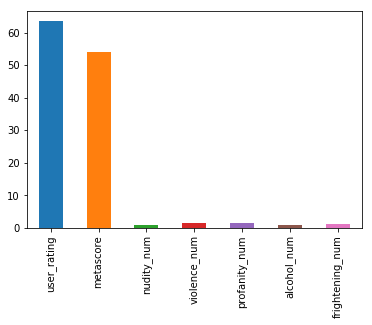

In [194]:
ax = mean_values.plot.bar(rot=90)

In [118]:
correlations = df.corr(method='kendall')

correlations

,user_rating,metascore,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
user_rating,1.000000,0.535180,-0.049426,-0.039845,0.030117,0.058835,0.080205
metascore,0.535180,1.000000,0.070055,-0.002913,0.127910,0.138088,0.084085
nudity_num,-0.049426,0.070055,1.000000,0.087037,0.427308,0.465998,0.013687
violence_num,-0.039845,-0.002913,0.087037,1.000000,0.365315,0.211354,0.705321
profanity_num,0.030117,0.127910,0.427308,0.365315,1.000000,0.515177,0.281706
alcohol_num,0.058835,0.138088,0.465998,0.211354,0.515177,1.000000,0.149896
frightening_num,0.080205,0.084085,0.013687,0.705321,0.281706,0.149896,1.000000


In [121]:
import matplotlib.pyplot as plt

import seaborn as sns

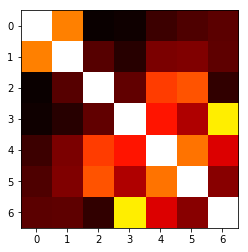

In [122]:
#plt.imshow(correlation_matrix,cmap='hot',interpolation='nearest')

heat = plt.imshow(correlations, cmap='hot', interpolation='nearest')

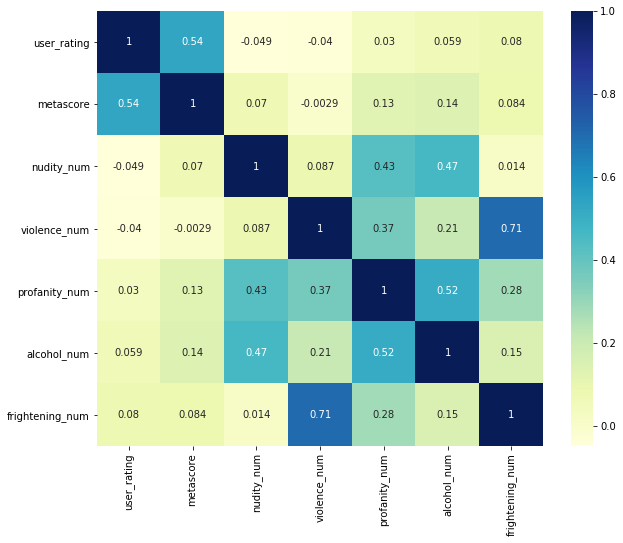

In [127]:
plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap="YlGnBu")

In [176]:
udf = pd.read_csv('user_movie_table.csv', sep='\t')

In [177]:
udf.describe()

,one,two,three,four,five,six,seven,eight,nine,ten,mean,median
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.0
mean,1741.730000,896.560000,1384.136000,2448.072000,5311.462000,10785.492000,16970.164000,15536.772000,8470.996000,8477.330000,0.0,0.0
std,3002.157725,1221.961171,1808.200949,3033.555126,6283.070749,12926.050147,24026.792623,28606.940869,20810.890538,23695.216961,0.0,0.0
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
25%,344.750000,145.750000,217.750000,430.500000,1059.500000,1869.000000,2190.000000,1142.750000,437.500000,718.250000,0.0,0.0
50%,777.000000,433.000000,686.000000,1273.500000,2942.000000,6016.500000,6557.000000,4157.000000,1522.500000,1891.000000,0.0,0.0
75%,1914.750000,1087.750000,1817.250000,3277.750000,7035.500000,14451.250000,21602.000000,13502.000000,5832.250000,5991.500000,0.0,0.0
max,33403.000000,11729.000000,14071.000000,18913.000000,38539.000000,70106.000000,130975.000000,164783.000000,184184.000000,264054.000000,0.0,0.0


In [178]:
#df.drop(['B', 'C'], axis=1)

user_df = udf.drop(['mean', 'median'], axis=1)

In [179]:
user_df.describe()

,one,two,three,four,five,six,seven,eight,nine,ten
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1741.730000,896.560000,1384.136000,2448.072000,5311.462000,10785.492000,16970.164000,15536.772000,8470.996000,8477.330000
std,3002.157725,1221.961171,1808.200949,3033.555126,6283.070749,12926.050147,24026.792623,28606.940869,20810.890538,23695.216961
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,344.750000,145.750000,217.750000,430.500000,1059.500000,1869.000000,2190.000000,1142.750000,437.500000,718.250000
50%,777.000000,433.000000,686.000000,1273.500000,2942.000000,6016.500000,6557.000000,4157.000000,1522.500000,1891.000000
75%,1914.750000,1087.750000,1817.250000,3277.750000,7035.500000,14451.250000,21602.000000,13502.000000,5832.250000,5991.500000
max,33403.000000,11729.000000,14071.000000,18913.000000,38539.000000,70106.000000,130975.000000,164783.000000,184184.000000,264054.000000


In [182]:
user_df.head()

,movie_id,one,two,three,four,five,six,seven,eight,nine,ten
0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166
1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181
2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054
3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001
4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904


In [183]:
def add_skewness(user_df):
    user_df['skewness'] = ((user_df['eight'] - user_df['six'])-(user_df['six'] - user_df['four']) - (user_df['four'] - user_df['two']))/(user_df['eight']-user_df['two'])
    return user_df

In [184]:
skewed = add_skewness(user_df)

In [185]:
skewed

,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,skewness
0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,0.539125
1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,0.091814
2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,0.649036
3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,0.001933
4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,0.446928
5,tt6105098,4946,1906,2591,4152,9542,20843,37913,30384,14490,18418,-0.329939
6,tt2771200,5012,2097,3270,6009,14028,34104,63826,55910,28259,37000,-0.189564
7,tt1979376,1201,393,538,1243,3142,9521,27222,43671,28153,21425,0.578169
8,tt4154664,25296,5468,6439,10373,22322,54507,101814,79179,32603,42259,-0.330575
9,tt4881806,5085,4346,7858,14232,31233,60129,60304,28480,9582,13361,-3.622773


In [197]:
skewed_df = pd.read_csv('skewed.csv', sep='\t')

In [198]:
skewed_df.head()

,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness
0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,7.732305,9.062292,9.888156,0.233840
1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,6.523247,7.579635,8.712002,-0.034714
2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,7.822384,8.950612,9.808394,0.136175
3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,5.737552,7.285458,8.475139,0.130854
4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,6.922419,7.827281,8.709160,0.012863


In [199]:
user_r = df['user_rating']
bigger_user_t = pd.concat([user_df, user_r], axis=1)

In [200]:
bigger_user_t.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num,skewness
0,tt0437086,Alita: Battle Angel,74,53,Rated PG-13 for sequences of sci-fi violence a...,None,Moderate,Mild,Mild,Moderate,0,2,1,1,2,0.233840
1,tt0448115,Shazam!,71,71,"Rated PG-13 for intense sequences of action, l...",None,Moderate,Mild,Mild,Moderate,0,2,1,1,2,-0.034714
2,tt0451279,Wonder Woman,74,76,Rated PG-13 for sequences of violence and acti...,Mild,Moderate,Mild,Mild,Mild,1,2,1,1,1,0.136175
3,tt0460890,The Only Living Boy in New York,63,33,Rated R for language and some drug material,Moderate,None,Moderate,Moderate,None,2,0,2,2,0,0.130854
4,tt0491175,Suburbicon,57,42,"Rated R for violence, language and some sexuality",Mild,Moderate,Moderate,Mild,Moderate,1,2,2,1,2,0.012863


In [ ]:
exclude = ['user_rating', 'metascore']
skewed_df.loc[:, skewed_df.columns.difference(exclude)].scatter()


In [201]:
df.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
0,tt0437086,Alita: Battle Angel,74,53,Rated PG-13 for sequences of sci-fi violence a...,None,Moderate,Mild,Mild,Moderate,0,2,1,1,2
1,tt0448115,Shazam!,71,71,"Rated PG-13 for intense sequences of action, l...",None,Moderate,Mild,Mild,Moderate,0,2,1,1,2
2,tt0451279,Wonder Woman,74,76,Rated PG-13 for sequences of violence and acti...,Mild,Moderate,Mild,Mild,Mild,1,2,1,1,1
3,tt0460890,The Only Living Boy in New York,63,33,Rated R for language and some drug material,Moderate,None,Moderate,Moderate,None,2,0,2,2,0
4,tt0491175,Suburbicon,57,42,"Rated R for violence, language and some sexuality",Mild,Moderate,Moderate,Mild,Moderate,1,2,2,1,2


In [202]:
user_df.head()

,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,skewness
0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,0.539125
1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,0.091814
2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,0.649036
3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,0.001933
4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,0.446928


In [203]:
skewed_df.head()

,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness
0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,7.732305,9.062292,9.888156,0.233840
1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,6.523247,7.579635,8.712002,-0.034714
2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,7.822384,8.950612,9.808394,0.136175
3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,5.737552,7.285458,8.475139,0.130854
4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,6.922419,7.827281,8.709160,0.012863


In [204]:
result_df = pd.merge(df, skewed_df, how='inner', on='movie_id')

In [208]:
result_df.tail()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,...,five,six,seven,eight,nine,ten,lower,median,upper,skewness
494,tt9019352,No Manches Frida 2,39,-1,Rated R for sexual content and teen drinking,None,Mild,Moderate,Mild,Mild,...,62,57,46,33,14,68,1.309645,3.764151,6.532609,-0.060110
495,tt9024106,Unplanned,58,10,Rated R for some disturbing/bloody images,None,Mild,None,None,Moderate,...,133,207,349,549,702,6463,5.803140,9.653412,10.076706,0.801901
496,tt9075778,The Fighting Preacher,53,-1,Rated PG for thematic content and some action.,None,None,None,None,None,...,13,11,17,15,15,55,2.062500,6.941176,9.640909,0.287520
497,tt9376172,The Least of These: The Graham Staines Story,63,-1,Rated PG-13 for thematic elements/disturbing i...,None,None,None,None,None,...,27,38,54,54,67,331,6.689815,9.501511,10.000755,0.698427
498,tt9896916,Pilgrim's Progress,51,-1,"Rated PG for mild thematic elements, action vi...",None,None,None,None,None,...,17,8,15,22,31,94,3.300000,8.000000,9.776596,0.451380


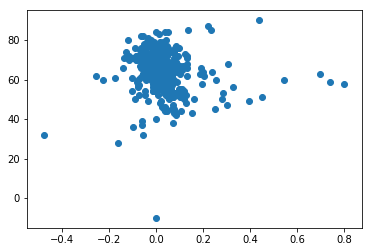

In [213]:
scatter_plot = plt.scatter(x=result_df['skewness'], y=result_df['user_rating'])

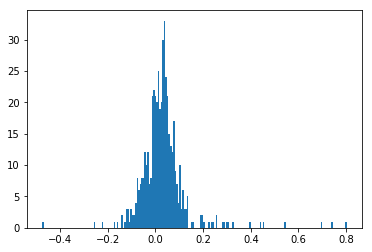

In [217]:
histogram = plt.hist(x=result_df['skewness'], bins=200)

In [222]:
!pip install plotly

    100% |████████████████████████████████| 7.3MB 2.4MB/s ta 0:00:011
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/agorina/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [223]:
import plotly.express as px

In [242]:


fig = px.scatter(x=result_df['skewness'], y=result_df['user_rating'], 
                 symbol=result_df['title'], title='Skewness vs User Ratings', opacity=0.5, color=result_df['skewness'], color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    
    xaxis_title="Skewness",
    yaxis_title="User Ratings",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    )
)

fig.show()

In [243]:
fig = px.scatter_3d(x=result_df['skewness'], y=result_df['user_rating'], z=result_df['metascore'],  
                 symbol=result_df['title'], title='Skewness vs User Ratings vs Metascore', opacity=0.5,
                   color=result_df['skewness'], color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    
    xaxis_title="Skewness",
    yaxis_title="User Ratings",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    )
)

fig.show()

In [246]:
bin_df = pd.read_csv('bins.csv', sep='\t')


In [247]:
bin_df.head()

,Unnamed: 0,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness,binned
0,0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,7.732305,9.062292,9.888156,0.233840,0.3
1,1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,6.523247,7.579635,8.712002,-0.034714,0.0
2,2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,7.822384,8.950612,9.808394,0.136175,0.1
3,3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,5.737552,7.285458,8.475139,0.130854,0.1
4,4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,6.922419,7.827281,8.709160,0.012863,0.0


In [248]:
#bin_df.groupby('binned')[]


with_bins = pd.merge(df, bin_df, how='inner', on='movie_id')

In [257]:
avg_user_bin = with_bins.groupby('binned')['user_rating', 'metascore'].mean()
avg_user_bin

,user_rating,metascore
binned,,
-0.4,32.000000,12.000000
-0.2,61.000000,47.000000
-0.1,64.970588,51.823529
0.0,65.082090,54.985075
0.1,61.588235,57.223529
0.3,62.454545,38.545455
0.4,55.666667,28.000000
0.5,63.333333,-1.000000
0.6,60.000000,-1.000000


In [258]:
type(avg_user_bin)

<class 'pandas.core.frame.DataFrame'>

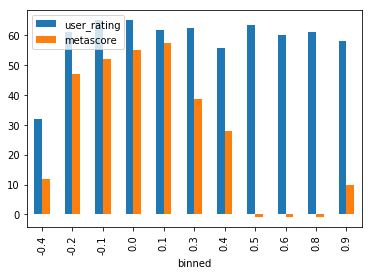

In [260]:
barbin = avg_user_bin.plot.bar()
plt.show()